<a href="https://colab.research.google.com/github/SaiAkhilluffy/frontendproject/blob/master/MAJOR_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROJECT:Create a classification model to predict whether a person makes over $50k a year** 

**IMPORTING NECESSARY LIBRARIES**

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as pplt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 


**EXTRACTING DATA SET**

In [ ]:
salary_dataset = pd.read_csv('/content/drive/MyDrive/adult (1).csv')

**DATASET**

In [ ]:
salary_dataset.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**INFORMATION OF DATASET**

In [ ]:
salary_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        32561 non-null  object
 2   fnlwgt           32561 non-null  int64 
 3   education        32561 non-null  object
 4   educational-num  32561 non-null  int64 
 5   marital-status   32561 non-null  object
 6   occupation       32561 non-null  object
 7   relationship     32561 non-null  object
 8   race             32561 non-null  object
 9   gender           32561 non-null  object
 10  capital-gain     32561 non-null  int64 
 11  capital-loss     32561 non-null  int64 
 12  hours-per-week   32561 non-null  int64 
 13  native-country   32561 non-null  object
 14  income           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
salary_dataset.rename(columns={'capital-gain': 'capital gain', 'capital-loss': 'capital loss', 'native-country': 'country','hours-per-week': 'hours per week','marital-status': 'marital'}, inplace=True)
salary_dataset.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital',
       'occupation', 'relationship', 'race', 'gender', 'capital gain',
       'capital loss', 'hours per week', 'country', 'income'],
      dtype='object')

# **DATA CLEANING**

**CHECKING FOR NULL VALUES IN THE DATASET**

In [ ]:
salary_dataset.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital            0
occupation         0
relationship       0
race               0
gender             0
capital gain       0
capital loss       0
hours per week     0
country            0
income             0
dtype: int64

**AS THERE ARE NO NULL VALUES NOW WE CHECK FOR SPECIAL CHARACTERS.**
**WE OBSERVE THAT THE SPECIAL CHRACTERS IN THE DATASET IS "?".**
*WE MUST NOW FIND THE QUESTION MARKS AND REPLACE THEM.*

In [ ]:
salary_dataset.isin([' ?']).sum(axis=0)

age                   0
workclass          1836
fnlwgt                0
education             0
educational-num       0
marital               0
occupation         1843
relationship          0
race                  0
gender                0
capital gain          0
capital loss          0
hours per week        0
country             583
income                0
dtype: int64

In [ ]:
salary_dataset['country'] = salary_dataset['country'].replace(' ?',np.nan)
salary_dataset['workclass'] = salary_dataset['workclass'].replace(' ?',np.nan)
salary_dataset['occupation'] = salary_dataset['occupation'].replace(' ?',np.nan)
salary_dataset.dropna(how='any',inplace=True)

**NOW WE REMOVED THE SPECIAL CHARCTERS FROM OUR DATASET**

In [ ]:
salary_dataset.isin([' ?']).sum(axis=0)

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital            0
occupation         0
relationship       0
race               0
gender             0
capital gain       0
capital loss       0
hours per week     0
country            0
income             0
dtype: int64

**FREQUENCY OF THE DATA FROM EACH COLUMN**

In [ ]:
for c in salary_dataset.columns:
    print ("---- %s ---" % c)
    print (salary_dataset[c].value_counts())

---- age ---
36    852
31    851
33    837
34    836
37    828
     ... 
82      7
83      5
88      3
85      3
86      1
Name: age, Length: 72, dtype: int64
---- workclass ---
 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
---- fnlwgt ---
203488    13
123011    12
113364    12
164190    12
121124    12
          ..
275818     1
318082     1
138342     1
158040     1
201490     1
Name: fnlwgt, Length: 20263, dtype: int64
---- education ---
 HS-grad         9840
 Some-college    6678
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
-

In [ ]:
salary_dataset.drop(['educational-num','age', 'hours per week', 'fnlwgt', 'capital gain','capital loss', 'country'], axis=1, inplace=True)

In [ ]:
salary_dataset.columns

Index(['workclass', 'education', 'marital', 'occupation', 'relationship',
       'race', 'gender', 'income'],
      dtype='object')

In [ ]:
salary_dataset['income'] = salary_dataset['income'].map({' <=50K': 0, ' >50K': 1}).astype(int)

**NEW DATA SET**

In [ ]:
salary_dataset.head()

,workclass,education,marital,occupation,relationship,race,gender,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,0
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0


In [ ]:
for c in salary_dataset.columns:
    print ("---- %s ---" % c)
    print (salary_dataset[c].value_counts())

---- workclass ---
 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
---- education ---
 HS-grad         9840
 Some-college    6678
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
---- marital ---
 Married-civ-spouse       14065
 Never-married             9726
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: marital, dtype: int64
---- occupation ---
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial  

**CHANGING THE DATATYPE FROM OBJECT TO INTEGER**

In [ ]:
salary_dataset['gender'] = salary_dataset['gender'].map({' Male': 0, ' Female': 1}).astype(int)
#race
salary_dataset['race'] = salary_dataset['race'].map({' Black': 0, ' Asian-Pac-Islander': 1,' Other': 2, ' White': 3, ' Amer-Indian-Eskimo': 4}).astype(int)
#marital
salary_dataset['marital'] = salary_dataset['marital'].map({' Married-spouse-absent': 0, ' Widowed': 1, ' Married-civ-spouse': 2, ' Separated': 3, ' Divorced': 4,' Never-married': 5, ' Married-AF-spouse': 6}).astype(int)
#workclass
salary_dataset['workclass'] = salary_dataset['workclass'].map({' Self-emp-inc': 0, ' State-gov': 1,' Federal-gov': 2, ' Without-pay': 3, ' Local-gov': 4,' Private': 5, ' Self-emp-not-inc': 6}).astype(int)
#education
salary_dataset['education'] = salary_dataset['education'].map({' Some-college': 0, ' Preschool': 1, ' 5th-6th': 2, ' HS-grad': 3, ' Masters': 4, ' 12th': 5, ' 7th-8th': 6, ' Prof-school': 7,' 1st-4th': 8, ' Assoc-acdm': 9, ' Doctorate': 10, ' 11th': 11,' Bachelors': 12, ' 10th': 13,' Assoc-voc': 14,' 9th': 15}).astype(int)
#occupation
salary_dataset['occupation'] = salary_dataset['occupation'].map({ ' Farming-fishing': 1, ' Tech-support': 2, ' Adm-clerical': 3, ' Handlers-cleaners': 4,' Prof-specialty': 5,' Machine-op-inspct': 6, ' Exec-managerial': 7,' Priv-house-serv': 8,' Craft-repair': 9,' Sales': 10, ' Transport-moving': 11, ' Armed-Forces': 12, ' Other-service': 13,' Protective-serv':14}).astype(int)
#relationship
salary_dataset['relationship'] = salary_dataset['relationship'].map({' Not-in-family': 0, ' Wife': 1, ' Other-relative': 2, ' Unmarried': 3,' Husband': 4,' Own-child': 5}).astype(int)

**COMPLETELY NEW DATA SET**

In [ ]:
salary_dataset.head()

,workclass,education,marital,occupation,relationship,race,gender,income
0,1,12,5,3,0,3,0,0
1,6,12,2,7,4,3,0,0
2,5,3,4,4,0,3,0,0
3,5,11,2,4,4,0,0,0
4,5,12,2,5,1,0,1,0


**RELATION BETWEEN THE COLUMNS WITH INCOME COLUMN**

**RELATION WITH WORKCLASS**

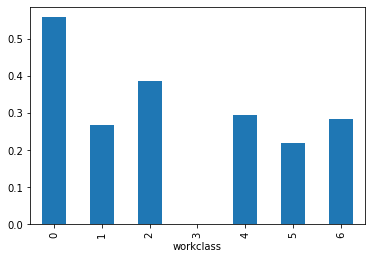

In [ ]:
salary_dataset.groupby('workclass').income.mean().plot(kind='bar')


**RELATION WITH EDUCATION**

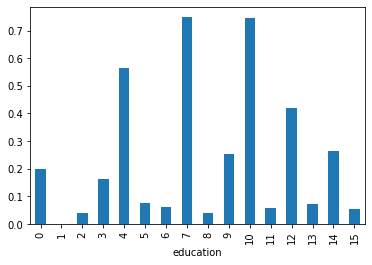

In [ ]:
salary_dataset.groupby('education').income.mean().plot(kind='bar')


**RELATION WITH OCCUPATION**

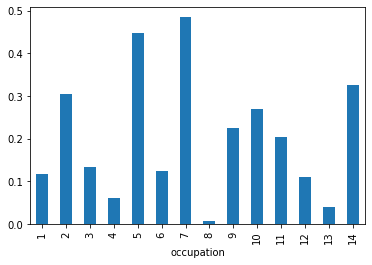

In [ ]:
salary_dataset.groupby('occupation').income.mean().plot(kind='bar')


**RELATION WITH RELATIONSHIP**

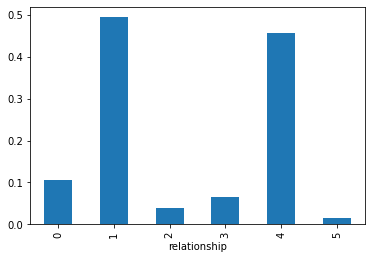

In [ ]:
salary_dataset.groupby('relationship').income.mean().plot(kind='bar')


**RELATION WITH RACE**

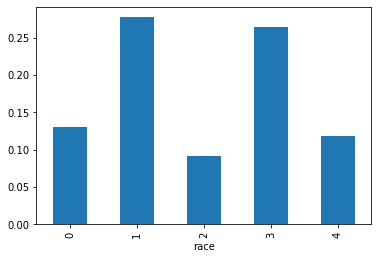

In [ ]:
salary_dataset.groupby('race').income.mean().plot(kind='bar')


**RELATION WITH GENDER**

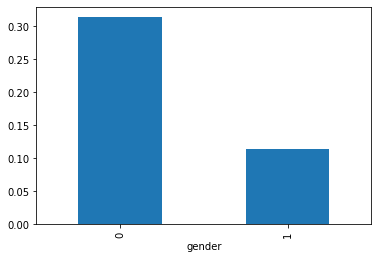

In [ ]:
salary_dataset.groupby('gender').income.mean().plot(kind='bar')


# **SPLITTING DATA SET INTO TESTING SET AND TRAINING SET**

In [ ]:
df_x = pd.DataFrame(np.c_[salary_dataset['relationship'], salary_dataset['education'], salary_dataset['race'],salary_dataset['occupation'],salary_dataset['gender'],salary_dataset['marital'],salary_dataset['workclass']], columns = ['relationship','education','race','occupation','gender','marital','workclass'])
df_y = pd.DataFrame(salary_dataset.income)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=42)
names=[]
scores=[]

In [ ]:
x_test.shape

(9954, 7)

# **APPLYING DIFFERENT MODELS NOW**

**DECISION TREE CLASSIFIER**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(random_state=42)
dtree.fit(x_train,y_train)
print("Decision tree classification score=",dtree.score(x_test,y_test))
names.append("Decison tree")
scores.append(dtree.score(x_test,y_test))
p=dtree.predict(x_test)

Decision tree classification score= 0.8130399839260599


**RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(random_state=42)
forest.fit(x_train,y_train)
print("Random forest classification score=",forest.score(x_test,y_test))
names.append("random forest")
scores.append(forest.score(x_test,y_test))
q=forest.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Random forest classification score= 0.816857544705646


***LINEAR SVC CLASSIFIER ***

In [ ]:
from sklearn.svm import LinearSVC
svm=LinearSVC(dual=False,random_state=42)
svm.fit(x_train,y_train)
print("SVM classification score=",svm.score(x_test,y_test))
names.append("SVM ")
scores.append(svm.score(x_test,y_test))
r=svm.predict(x_test)

SVM classification score= 0.7488446855535463


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**KNN CLASSIFIER**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knc.fit(x_train,y_train)
print("KNN classification score=",knc.score(x_test,y_test))
names.append("KNN")
scores.append(knc.score(x_test,y_test))
s=knc.predict(x_test)


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN classification score= 0.7816958006831425


**LOGISTIC REGRESSION CLASSIFIER**

In [ ]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression(random_state=42)
lgr.fit(x_train,y_train)
print("Logistic regression score=",lgr.score(x_test,y_test))
names.append("Logistic Regression")
scores.append(lgr.score(x_test,y_test))
t=lgr.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic regression score= 0.749146071930882


# **CLASSIFICATION REPORT**

In [ ]:
from sklearn.metrics import classification_report

**DECISION TREE CLASSIFICATION REPORT**

In [ ]:
report_dtree=classification_report(y_test,p)
print(report_dtree)

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      7440
           1       0.65      0.57      0.61      2514

    accuracy                           0.81      9954
   macro avg       0.75      0.73      0.74      9954
weighted avg       0.81      0.81      0.81      9954



**RANDOM FOREST CLASSIFICATION REPORT**

In [ ]:
report_forest=classification_report(y_test,q)
print(report_forest)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      7440
           1       0.65      0.58      0.62      2514

    accuracy                           0.82      9954
   macro avg       0.76      0.74      0.75      9954
weighted avg       0.81      0.82      0.81      9954



**LINEAR SVC CLASSIFIACTION REPORT**

In [ ]:
report_SVM=classification_report(y_test,r)
print(report_SVM)

              precision    recall  f1-score   support

           0       0.77      0.95      0.85      7440
           1       0.51      0.14      0.22      2514

    accuracy                           0.75      9954
   macro avg       0.64      0.55      0.53      9954
weighted avg       0.70      0.75      0.69      9954



**KNN CLASSIFIER CLASSIFICATION REPORT**

In [ ]:
report_KNN=classification_report(y_test,s)
print(report_KNN)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      7440
           1       0.58      0.47      0.52      2514

    accuracy                           0.78      9954
   macro avg       0.71      0.68      0.69      9954
weighted avg       0.77      0.78      0.77      9954



**LOGISTIC REGRESSION CLASSIFIER CLASSIFICATION REPORT**

In [ ]:
report_lgr=classification_report(y_test,t)
print(report_lgr)

              precision    recall  f1-score   support

           0       0.78      0.93      0.85      7440
           1       0.51      0.21      0.30      2514

    accuracy                           0.75      9954
   macro avg       0.64      0.57      0.57      9954
weighted avg       0.71      0.75      0.71      9954



# **PREDICTION OF DIFFERENT MODELS THROUGH PIE CHARTS**

**DECISION TREE PREDICTION**

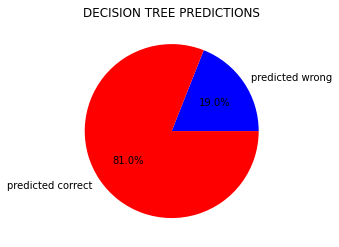

In [ ]:
c1=[1891.26,8062.74]
l=["predicted wrong","predicted correct"]
pplt.pie(c1,labels=l,autopct='%0.1f%%',colors=['blue','red'])
pplt.title("DECISION TREE PREDICTIONS")
pplt.show()

**RANDOM FOREST PREDICTION**

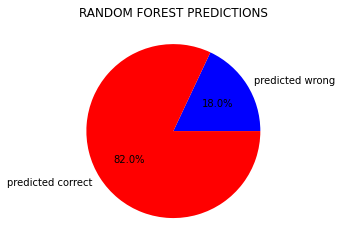

In [ ]:
c2=[1791.72,8162.28]
l1=["predicted wrong","predicted correct"]
pplt.pie(c2,labels=l1,autopct='%0.1f%%',colors=['blue','red'])
pplt.title("RANDOM FOREST PREDICTIONS")
pplt.show()

**LINEARSVC PREDICTION**

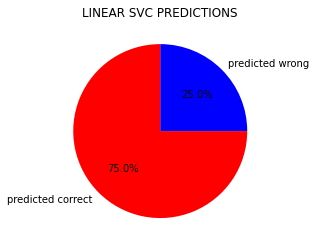

In [ ]:
c3=[2488.5,7465.5]
l2=["predicted wrong","predicted correct"]
pplt.pie(c3,labels=l2,autopct='%0.1f%%',colors=['blue','red'])
pplt.title("LINEAR SVC PREDICTIONS")
pplt.show()

**KNN CLASSIFIER PREDICTION**

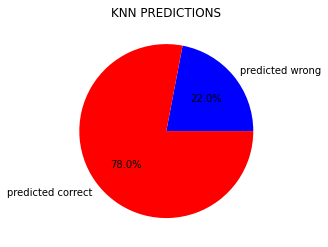

In [ ]:
c4=[2189.88,7764.12]
l3=["predicted wrong","predicted correct"]
pplt.pie(c4,labels=l3,autopct='%0.1f%%',colors=['blue','red'])
pplt.title("KNN PREDICTIONS")
pplt.show()

**LOGISTIC REGRESSION PREDICTION**

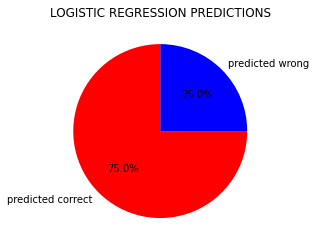

In [ ]:
c5=[2488.5,7465.5]
l4=["predicted wrong","predicted correct"]
pplt.pie(c5,labels=l4,autopct='%0.1f%%',colors=['blue','red'])
pplt.title("LOGISTIC REGRESSION PREDICTIONS")
pplt.show()

# **CONFUSION MATRICES FOR THE DIFFERENT MODELS**

In [ ]:
from sklearn.metrics import confusion_matrix

**CONFUSION MATRIX FOR DECISION TREE**

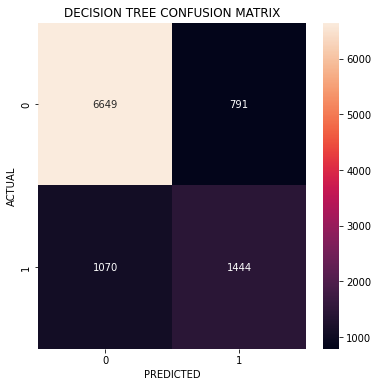

In [ ]:
conf1=confusion_matrix(y_test,p)
pplt.figure(figsize=(6,6))
sns.heatmap(conf1,annot=True,fmt=".0f")
pplt.ylabel("ACTUAL")
pplt.xlabel("PREDICTED")
pplt.title("DECISION TREE CONFUSION MATRIX")
pplt.show()

**CONFUSION MATRIX FOR RANDOM FOREST**

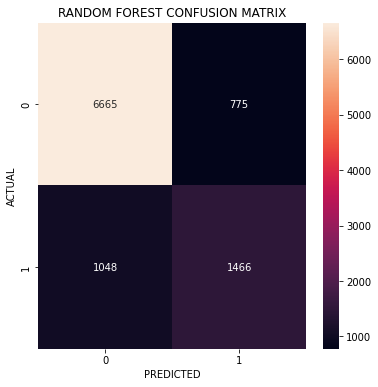

In [ ]:
conf2=confusion_matrix(y_test,q)
pplt.figure(figsize=(6,6))
sns.heatmap(conf2,annot=True,fmt=".0f")
pplt.ylabel("ACTUAL")
pplt.xlabel("PREDICTED")
pplt.title("RANDOM FOREST CONFUSION MATRIX")
pplt.show()

**CONFUSION MATRIX FOR LINEARSVC**

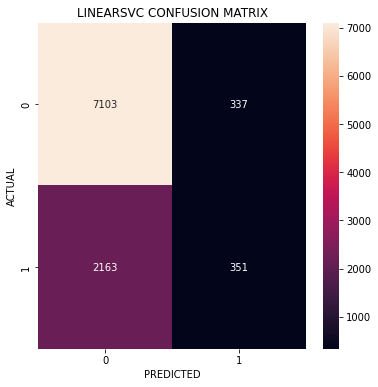

In [ ]:
conf3=confusion_matrix(y_test,r)
pplt.figure(figsize=(6,6))
sns.heatmap(conf3,annot=True,fmt=".0f")
pplt.ylabel("ACTUAL")
pplt.xlabel("PREDICTED")
pplt.title("LINEARSVC CONFUSION MATRIX")
pplt.show()

**CONFUSION MATRIX FOR KNN CLASSIFIER**

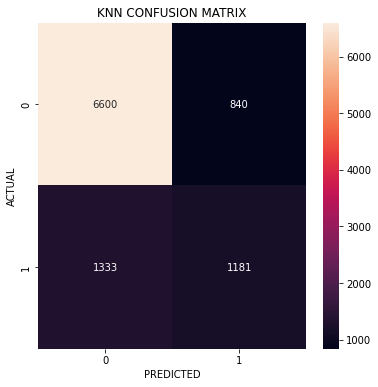

In [ ]:
conf4=confusion_matrix(y_test,s)
pplt.figure(figsize=(6,6))
sns.heatmap(conf4,annot=True,fmt=".0f")
pplt.ylabel("ACTUAL")
pplt.xlabel("PREDICTED")
pplt.title("KNN CONFUSION MATRIX")
pplt.show()

**CONFUSION MATRIX FOR LINEAR REGRESSION CLASSIFIER**

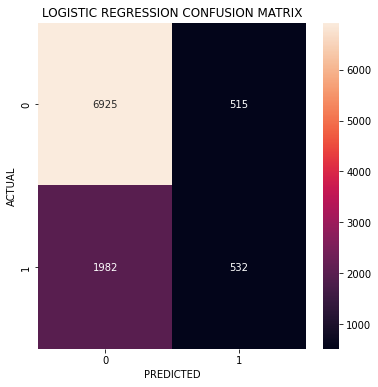

In [ ]:
conf5=confusion_matrix(y_test,t)
pplt.figure(figsize=(6,6))
sns.heatmap(conf5,annot=True,fmt=".0f")
pplt.ylabel("ACTUAL")
pplt.xlabel("PREDICTED")
pplt.title("LOGISTIC REGRESSION CONFUSION MATRIX")
pplt.show()

# **Verificaion of result for Precision, Recall, F1-score and Accuracy for each model based on values from confusion matrix and classification report**

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

**VERIFICATION FOR DECISION TREE**

In [ ]:
print(f"Accuracy: {round(accuracy_score(y_test, p), 2)}") 
print(f"Precision: {round(precision_score(y_test, p), 2)}")
print(f"Recall: {round(recall_score(y_test, p), 2)}")
print(f"F1_score: {round(f1_score(y_test, p), 2)}")

Accuracy: 0.81
Precision: 0.65
Recall: 0.57
F1_score: 0.61


**VERIFICATION FOR RANDOM FOREST**

In [ ]:
print(f"Accuracy: {round(accuracy_score(y_test, q), 2)}") 
print(f"Precision: {round(precision_score(y_test, q), 2)}")
print(f"Recall: {round(recall_score(y_test, q), 2)}")
print(f"F1_score: {round(f1_score(y_test, q), 2)}")

Accuracy: 0.82
Precision: 0.65
Recall: 0.58
F1_score: 0.62


**VERIFICATION FOR LINEARSVC**

In [ ]:
print(f"Accuracy: {round(accuracy_score(y_test, r), 2)}") 
print(f"Precision: {round(precision_score(y_test, r), 2)}")
print(f"Recall: {round(recall_score(y_test, r), 2)}")
print(f"F1_score: {round(f1_score(y_test, r), 2)}")

Accuracy: 0.75
Precision: 0.51
Recall: 0.14
F1_score: 0.22


**VERIFICATION FOR KNN CLASSIFIER**

In [ ]:
print(f"Accuracy: {round(accuracy_score(y_test, s), 2)}") 
print(f"Precision: {round(precision_score(y_test, s), 2)}")
print(f"Recall: {round(recall_score(y_test, s), 2)}")
print(f"F1_score: {round(f1_score(y_test, s), 2)}")

Accuracy: 0.78
Precision: 0.58
Recall: 0.47
F1_score: 0.52


**VERIFICATION FOR LINEAR REGRESSION**

In [ ]:
print(f"Accuracy: {round(accuracy_score(y_test, t), 2)}") 
print(f"Precision: {round(precision_score(y_test, t), 2)}")
print(f"Recall: {round(recall_score(y_test, t), 2)}")
print(f"F1_score: {round(f1_score(y_test, t), 2)}")

Accuracy: 0.75
Precision: 0.51
Recall: 0.21
F1_score: 0.3


# **PERCENTAGE OF MISCLASSIFICATION FOR DIFFERENT MODELS**

In [ ]:
print(f" percentage of Misclassification in Decision Tree Classification: {(1-round(accuracy_score(y_test, p), 2))}")
print(f" percentage of Misclassification in Random Forest Classification: {(1-round(accuracy_score(y_test, q), 2))}")
print(f" percentage of Misclassification in SVM Classification: {(1-round(accuracy_score(y_test, r), 2))}")
print(f" percentage of Misclassification in KNN Classification: {(1-round(accuracy_score(y_test, s), 2))}")
print(f" percentage of Misclassification in Logistic Regression Classification: {(1-round(accuracy_score(y_test, t), 2))}")

 percentage of Misclassification in Decision Tree Classification: 0.18999999999999995
 percentage of Misclassification in Random Forest Classification: 0.18000000000000005
 percentage of Misclassification in SVM Classification: 0.25
 percentage of Misclassification in KNN Classification: 0.21999999999999997
 percentage of Misclassification in Logistic Regression Classification: 0.25


In [ ]:
print(scores)

[0.8130399839260599, 0.816857544705646, 0.7488446855535463, 0.7816958006831425, 0.749146071930882]


**COMPARISION OF PERFORMANCE OF DIFFERENT MODELS**

Text(0, 0.5, 'Algorithm Score')

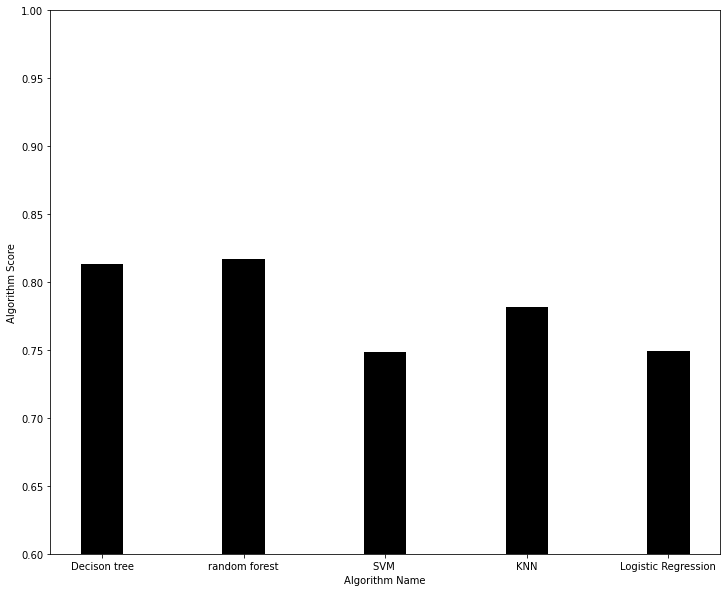

In [ ]:
pplt.figure(figsize=(12,10))
pplt.ylim([0.60,1])
pplt.bar(names,scores,width=0.3,color=['black'])
pplt.xlabel("Algorithm Name")
pplt.ylabel("Algorithm Score")

# **CONCLUSION REPORT**

**BASED ON THE PRECISION,CONFUSION MATRICES AND THROUGH THE CLASSIFICATION REPORTS WE CAN CONCLUDE THAT THE RANDOM FOREST ALGORITHM OR MODEL IS BEST SUITED FOR THIS PROBLEM STATEMENT WHERE WE HAVE TO PREDICT THE INCOME OF A PERSON BASED DIFFERENT CATEGORIES SOME OF THEM ARE OCCUPATION,WORKCLASS AND MAY MORE.LINEAR REGRESSION MODEL AND SVC CLASSIFIER IS LEAST SUITABLE FOR THIS PROBLEM STATEMENT BASED ON THE SAME ANALYSIS.**